### Introduction:

We are going to use Apple's stock price.

### Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Assign it to a variable apple

In [12]:
import pandas as pd

In [13]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


###  Check out the type of the columns

In [14]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Transform the Date column as a datetime type

In [15]:
apple.Date = pd.to_datetime(apple.Date)

apple.Date.head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

###  Set the date as the index

In [16]:
apple =apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


###  Is there any duplicate dates?

In [18]:
apple.index.duplicated().sum()

0

In [21]:
apple.index.is_unique

True

###  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [23]:
apple.sort_index(ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Get the last business day of each month

In [24]:
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


###  What is the difference in days between the first day and the oldest

In [26]:
(apple.index.max() - apple.index.min()).days

12261

###  How many months in the data we have?

In [27]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [28]:
import matplotlib.pyplot as plt

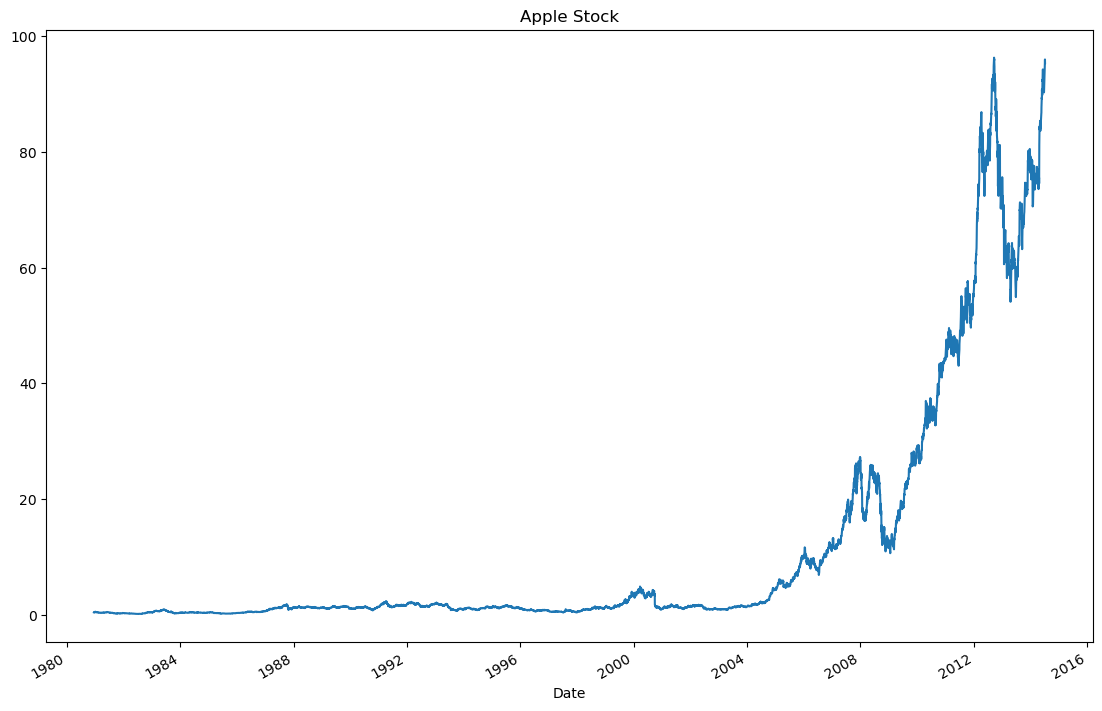

In [29]:
appl_open = apple['Adj Close'].plot(title = "Apple Stock")


fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.